# Diamond Price Prediction

* Our objective is to predict the price of the diamond.

### Features:

* **carat**: Weight of the diamond

* **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* **color**: Diamond color

* **depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

* **table**: Width of top of the diamond relative to the widest point 

* **price**: Price of a diamond in US dollars (target/dependent variable)

* **x**: Length of a diamond in mm

* **y**: Width of a diamond in mm

* **z**: Depth of a diamond in mm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diamond_data.csv")

In [3]:
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [4]:
df.shape

(1547, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   1547 non-null   float64
 1   cut     1547 non-null   object 
 2   color   1547 non-null   object 
 3   depth   1547 non-null   float64
 4   table   1547 non-null   float64
 5   price   1547 non-null   int64  
 6   x       1547 non-null   float64
 7   y       1547 non-null   float64
 8   z       1547 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 108.9+ KB


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,0.791325,61.762185,57.445184,3938.685844,5.713594,5.714460,3.528203
std,0.475814,1.439904,2.235772,4117.039798,1.126730,1.116477,0.693149
min,0.230000,54.600000,52.000000,327.000000,3.860000,3.880000,2.310000
25%,0.400000,61.100000,56.000000,918.000000,4.705000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2301.000000,5.640000,5.660000,3.500000
75%,1.035000,62.500000,59.000000,5188.000000,6.535000,6.520000,4.030000
max,2.660000,71.800000,70.000000,18803.000000,9.080000,9.010000,5.540000


In [8]:
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [9]:
df["cut"].value_counts()

Ideal        611
Premium      389
Very Good    358
Good         148
Fair          41
Name: cut, dtype: int64

In [10]:
df["color"].value_counts()

G    317
E    281
F    274
H    244
D    206
I    141
J     84
Name: color, dtype: int64

Numerical and categorical columns:

In [11]:
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

**Box Plot to check Outliers**

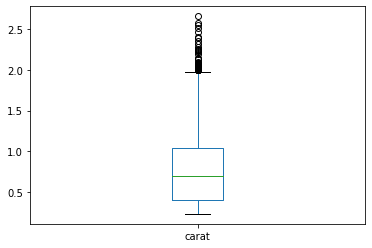

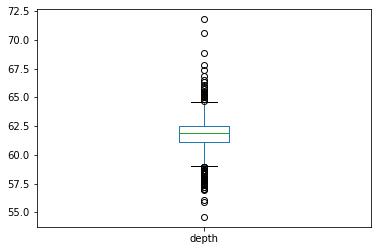

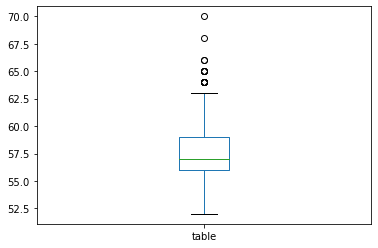

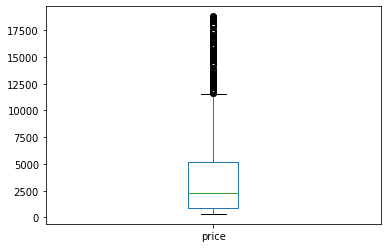

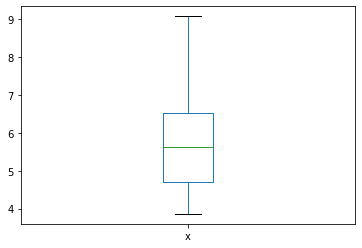

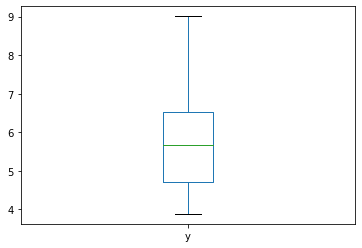

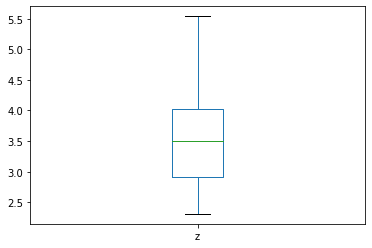

In [12]:
for i in df.select_dtypes(include=np.number).columns:
    df[i].plot(kind="box")
    plt.show()

* Outliers are present in carat,depth,table,price columns
* We can handle outliers using Power transform

**Pie chat for categorical variables:**


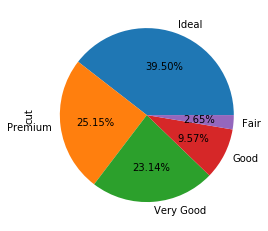

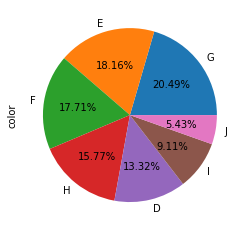

In [13]:
for i in ["cut","color"]:
    df[i].value_counts().plot(kind="pie",autopct="%.2f%%")
    plt.show()

**Train_Test_Split and Preprocessing**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [15]:
final_df = pd.get_dummies(df,drop_first=True)
inp = final_df.drop("price",axis=1)
out = final_df["price"]

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size=0.2,random_state=0)

pf = PowerTransformer()
xtrain_pf = pd.DataFrame(pf.fit_transform(xtrain),columns=xtrain.columns,index=xtrain.index)
xtest_pf = pd.DataFrame(pf.transform(xtest),columns=xtest.columns,index=xtest.index)

**Base model:**

In [17]:
import statsmodels.api as sm

In [18]:
xtrain_pf_con = sm.add_constant(xtrain_pf)
ols = sm.OLS(ytrain,xtrain_pf_con)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     275.2
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:53:40   Log-Likelihood:                -11089.
No. Observations:                1237   AIC:                         2.221e+04
Df Residuals:                    1220   BIC:                         2.230e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3898.4584     54.163     71.976      0.000    3792.195    4004.722
carat          1.985e+04   1118.131     17.751      0.000    1.77e+04     2.2e+04
depth         -1749.9287    549.647     -3.184      0.001   -2828.287    -671.570
table          -402.5214     73.181     -5.500      0.000    -546.096    -258.947
x             -1.411e+04   2687.498     -5.250      0.000   -1.94e+04   -8837.940
y             -8771.2558   2599.964     -3.374      0.001   -1.39e+04   -3670.360
z              6654.2278   4741.432      1.403      0.161   -2648.036     1.6e+04
cut_Good         27.2899    120.429      0.227      0.821    -208.981     263.561
cut_Ideal       210.3725    197.579      1.065      0.287    -177.259     598.004
cut_Premium     127.7144    171.441      0.745      0.456    -208.637     464.065
cut_Very Good   109.1606    168.110      0.649      0.516    -220.657     438.978
color_E           8.8836     75.124      0.118      0.906    -138.503     156.270
color_F         102.7639     75.434      1.362      0.173     -45.231     250.759
color_G          32.5738     77.092      0.423      0.673    -118.674     183.822
color_H        -114.3512     74.015     -1.545      0.123    -259.562      30.859
color_I        -118.7698     67.427     -1.761      0.078    -251.056      13.516
color_J        -259.2809     63.384     -4.091      0.000    -383.634    -134.927
==============================================================================
Omnibus:                      329.615   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1057.511
Skew:                           1.304   Prob(JB):                    2.31e-230
Kurtosis:                       6.704   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assumption:**

Linearity:

In [19]:
from statsmodels.stats.diagnostic import linear_rainbow
# H0 : Part of the data is Linear

sta,p = linear_rainbow(res=ols_mod,frac=0.5)
if p>0.05:
    print("PART OF DATA IS LINEAR")
    print("-- Linearity Assumption is satisfied")
else:
    print("Linearity assumption is failed")

PART OF DATA IS LINEAR
-- Linearity Assumption is satisfied


Normality:

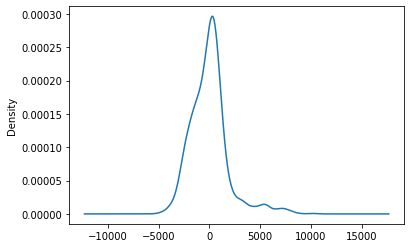

In [20]:
ols_mod.resid.plot(kind='kde')
plt.show()

In [21]:
print(ols_mod.resid.skew())

1.305471855201321


* Right skewed

Transforming the target variable:

In [22]:
ytrain_tf = ytrain.apply(lambda x:np.log(x))
ytest_tf = ytest.apply(lambda x:np.log(x))

In [23]:
xtrain_pf_con = sm.add_constant(xtrain_pf)
ols = sm.OLS(ytrain_tf,xtrain_pf_con)
ols_modn = ols.fit()
ols_modn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1752.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:53:40   Log-Likelihood:                 184.74
No. Observations:                1237   AIC:                            -335.5
Df Residuals:                    1220   BIC:                            -248.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.7643      0.006   1301.305      0.000       7.753       7.776
carat             1.4793      0.123     12.010      0.000       1.238       1.721
depth             0.0664      0.061      1.096      0.273      -0.052       0.185
table            -0.0292      0.008     -3.620      0.000      -0.045      -0.013
x                 0.3357      0.296      1.134      0.257      -0.245       0.917
y                 0.0667      0.286      0.233      0.816      -0.495       0.629
z                -0.8512      0.522     -1.630      0.103      -1.876       0.173
cut_Good          0.0234      0.013      1.762      0.078      -0.003       0.049
cut_Ideal         0.0945      0.022      4.344      0.000       0.052       0.137
cut_Premium       0.0603      0.019      3.192      0.001       0.023       0.097
cut_Very Good     0.0623      0.019      3.365      0.001       0.026       0.099
color_E          -0.0084      0.008     -1.015      0.310      -0.025       0.008
color_F          -0.0016      0.008     -0.190      0.849      -0.018       0.015
color_G          -0.0106      0.008     -1.247      0.213      -0.027       0.006
color_H          -0.0616      0.008     -7.555      0.000      -0.078      -0.046
color_I          -0.0737      0.007     -9.919      0.000      -0.088      -0.059
color_J          -0.0883      0.007    -12.642      0.000      -0.102      -0.075
==============================================================================
Omnibus:                       19.044   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.139
Skew:                           0.049   Prob(JB):                     6.37e-08
Kurtosis:                       3.796   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.305471855201321


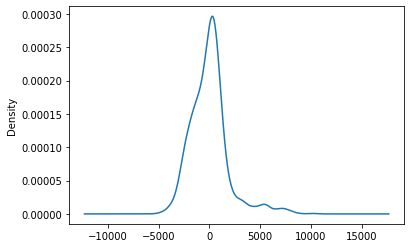

0.048596538062762436


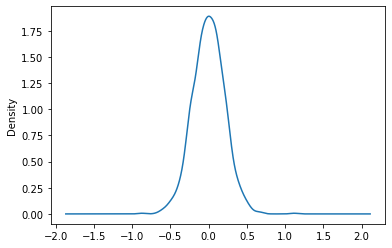

In [24]:
for i in [ols_mod,ols_modn]:
    i.resid.plot(kind='kde')
    print(i.resid.skew())
    plt.show()

* Thus after transforming target variable, normality assumption is satified.  

Multicollinearity:

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

xtrain_pf = xtrain_pf-(xtrain_pf.mean()) # partial scaling

In [26]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(xtrain_pf.values,i) for i in range(xtrain_pf.shape[1])]
vif['feature'] = xtrain_pf.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
5,7663.171913,z
3,2461.988270,x
4,2304.220656,y
0,426.161990,carat
1,102.981073,depth
7,13.306670,cut_Ideal
8,10.018825,cut_Premium
9,9.633389,cut_Very Good
6,4.943713,cut_Good
12,2.025868,color_G


In [27]:
xtrain_pf = xtrain_pf.drop("z",axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(xtrain_pf.values,i) for i in range(xtrain_pf.shape[1])]
vif['feature'] = xtrain_pf.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
3,685.755842,x
4,654.425790,y
0,403.615062,carat
6,11.949350,cut_Ideal
7,8.840883,cut_Premium
8,8.644220,cut_Very Good
5,4.557498,cut_Good
1,2.646819,depth
11,2.025494,color_G
10,1.937173,color_F


In [28]:
xtrain_pf = xtrain_pf.drop("x",axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(xtrain_pf.values,i) for i in range(xtrain_pf.shape[1])]
vif['feature'] = xtrain_pf.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,336.208028,carat
3,332.815907,y
5,11.733142,cut_Ideal
6,8.834381,cut_Premium
7,8.261070,cut_Very Good
4,4.465030,cut_Good
1,2.507067,depth
10,2.025229,color_G
9,1.934312,color_F
8,1.918160,color_E


In [29]:
xtrain_pf = xtrain_pf.drop("y",axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(xtrain_pf.values,i) for i in range(xtrain_pf.shape[1])]
vif['feature'] = xtrain_pf.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
4,11.728073,cut_Ideal
5,8.811369,cut_Premium
6,8.256665,cut_Very Good
3,4.464987,cut_Good
9,2.024878,color_G
8,1.933687,color_F
7,1.917307,color_E
10,1.862147,color_H
2,1.730260,table
11,1.546612,color_I


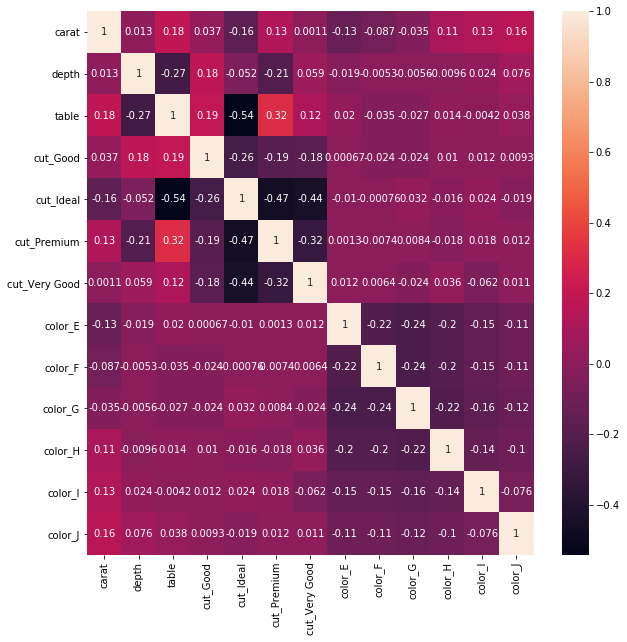

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(final_df[xtrain_pf.columns].corr(),annot=True)
plt.show()

In [31]:
xtest_pf = xtest_pf.drop(["x","y","z"],axis=1)

Homoscadasity:


In [32]:
from statsmodels.stats.api import het_goldfeldquandt

stat,p,nat=het_goldfeldquandt(ols_modn.resid,xtrain_pf)
if p>0.05:
    print("Model is homoscadastic")
else:
    print("Model is heteroscadastic")

Model is homoscadastic


No Auto Correlation:

In [33]:
ols_modn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1752.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:53:43   Log-Likelihood:                 184.74
No. Observations:                1237   AIC:                            -335.5
Df Residuals:                    1220   BIC:                            -248.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.7643      0.006   1301.305      0.000       7.753       7.776
carat             1.4793      0.123     12.010      0.000       1.238       1.721
depth             0.0664      0.061      1.096      0.273      -0.052       0.185
table            -0.0292      0.008     -3.620      0.000      -0.045      -0.013
x                 0.3357      0.296      1.134      0.257      -0.245       0.917
y                 0.0667      0.286      0.233      0.816      -0.495       0.629
z                -0.8512      0.522     -1.630      0.103      -1.876       0.173
cut_Good          0.0234      0.013      1.762      0.078      -0.003       0.049
cut_Ideal         0.0945      0.022      4.344      0.000       0.052       0.137
cut_Premium       0.0603      0.019      3.192      0.001       0.023       0.097
cut_Very Good     0.0623      0.019      3.365      0.001       0.026       0.099
color_E          -0.0084      0.008     -1.015      0.310      -0.025       0.008
color_F          -0.0016      0.008     -0.190      0.849      -0.018       0.015
color_G          -0.0106      0.008     -1.247      0.213      -0.027       0.006
color_H          -0.0616      0.008     -7.555      0.000      -0.078      -0.046
color_I          -0.0737      0.007     -9.919      0.000      -0.088      -0.059
color_J          -0.0883      0.007    -12.642      0.000      -0.102      -0.075
==============================================================================
Omnibus:                       19.044   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.139
Skew:                           0.049   Prob(JB):                     6.37e-08
Kurtosis:                       3.796   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Durbin-Watson: 1.910 ( Value is near to 2 )
* Thus there is no auto correlation

**Model building**


In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
mod = lr.fit(xtrain_pf,ytrain_tf)
print("train r2_score:")
print(mod.score(xtrain_pf,ytrain_tf))
print("test r2_score:")
print(mod.score(xtest_pf,ytest_tf))
ypred = mod.predict(xtest_pf)
ypred_train = mod.predict(xtrain_pf)

train r2_score:
0.9577780127777169
test r2_score:
0.9482565681973845


**Model performance**

In [35]:
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(ytrain_tf,ypred_train))
test_rmse = np.sqrt(mean_squared_error(ytest_tf,ypred))

In [36]:
print("train-",train_rmse,"\ntest-",test_rmse)

train- 0.20968005786615204 
test- 0.23993593517474623


In [37]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
score = cross_val_score(lr,xtrain_pf,ytrain_tf,cv=5,scoring='neg_mean_squared_error')
avg_score = np.mean(score)
ve = np.std(score)
cve = np.std(score)/np.mean(score)
print("Average_Neg_mean_error:",avg_score,"\nVariance_error:",ve,"\nCoefficient of Variance error:",cve)

Average_Neg_mean_error: -0.04488633332063802 
Variance_error: 0.0037067650665662043 
Coefficient of Variance error: -0.08258115092822459


**Final prediction output for test data:**

In [38]:
outcome = pd.concat([xtest_pf,ytest_tf],axis=1)
outcome["Predicted _ values"] = ypred

In [39]:
outcome[["price","Predicted _ values"]].head()

,price,Predicted _ values
260,6.356108,6.211731
310,6.587550,6.858086
54,8.268219,8.460320
161,6.473891,7.042968
1247,9.539860,9.204386


Feature importance in terms of coefficient:

In [40]:
importance = pd.DataFrame({"coef_":mod.coef_},index=xtest_pf.columns)
importance

,coef_
carat,1.029590
depth,-0.007665
table,-0.022208
cut_Good,0.018056
cut_Ideal,0.083048
cut_Premium,0.053115
cut_Very Good,0.053024
color_E,-0.009568
color_F,-0.002733
color_G,-0.011212


-------------------------------------------------------------